In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load dataset
df = pd.read_stata('Electrification_Database.dta')

In [3]:
df.head()

,countryname,countrycode,year,elecrate_total,elecrate_urban,elecrate_rural
0,Albania,ALB,1970,100.0,NaN,NaN
1,Algeria,DZA,1966,33.7,74.0,11.8
2,Algeria,DZA,1969,40.0,NaN,NaN
3,Algeria,DZA,1977,45.8,NaN,NaN
4,Algeria,DZA,1981,59.0,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   countryname     1035 non-null   object 
 1   countrycode     1035 non-null   object 
 2   year            1035 non-null   int16  
 3   elecrate_total  961 non-null    float64
 4   elecrate_urban  596 non-null    float64
 5   elecrate_rural  647 non-null    float64
dtypes: float64(3), int16(1), object(2)
memory usage: 50.5+ KB


In [5]:
#check for missing data
df[['elecrate_total','elecrate_urban','elecrate_rural']].isnull().sum()

elecrate_total     74
elecrate_urban    439
elecrate_rural    388
dtype: int64

In [6]:
#check for duplicates
duplicates = df.duplicated()
duplicates.sum()
#no duplicates found

0

In [7]:
#number of missing data in target column
df['elecrate_total'].isnull().sum()

74

In [8]:
#fill in missing data in target column
df['elecrate_total'].interpolate(method='linear',inplace=True, limit_direction='forward')
df['elecrate_total'].isnull().sum()
#missing data handled

0

<AxesSubplot:xlabel='elecrate_total', ylabel='Count'>

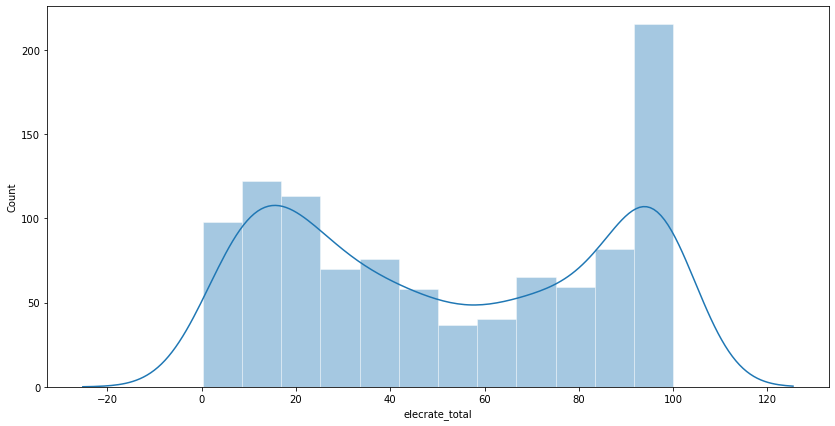

In [9]:
# Distribution of the target variable after handling missing data
fig, ax = plt.subplots(figsize=(14,7))
sns.histplot(df['elecrate_total'], kde=True, kde_kws=dict(cut=3),
             alpha=.4, edgecolor=(1, 1, 1, .4), ax=ax)
#the distribution of the target variable is skewed so we will have to scale later

In [10]:
#handling missing data in predictor(urban electrical rate) column
df['elecrate_urban'].interpolate(method='linear',inplace=True, limit_direction='forward')
df['elecrate_urban'].isnull().sum()

1

In [11]:
#there is still one missing data to be handled
df['elecrate_urban'].isnull()

0        True
1       False
2       False
3       False
4       False
        ...  
1030    False
1031    False
1032    False
1033    False
1034    False
Name: elecrate_urban, Length: 1035, dtype: bool

In [12]:
#handle missing data using the mean of the variable
df['elecrate_urban'].fillna(df['elecrate_urban'].mean(), inplace=True)
df['elecrate_urban'].isnull().sum()

0

<AxesSubplot:xlabel='elecrate_urban', ylabel='Count'>

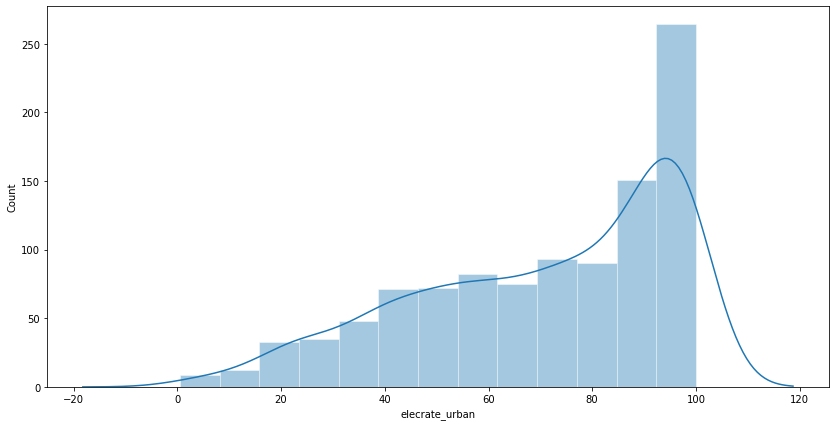

In [13]:
# Distribution of urban electrical rate after handling missing data
fig, ax = plt.subplots(figsize=(14,7))
sns.histplot(df['elecrate_urban'], kde=True, kde_kws=dict(cut=3),
             alpha=.4, edgecolor=(1, 1, 1, .4), ax=ax)
#distribution is skewed

In [14]:
#handling missing data in predictor(rural electrical rate) column
df['elecrate_rural'].interpolate(method='linear',inplace=True, limit_direction='forward')
df['elecrate_rural'].isnull().sum()

1

In [15]:
#there is still one missing data to be handled
df['elecrate_rural'].isnull()

0        True
1       False
2       False
3       False
4       False
        ...  
1030    False
1031    False
1032    False
1033    False
1034    False
Name: elecrate_rural, Length: 1035, dtype: bool

In [16]:
#handle missing data using mean of the rural electrical rate variable
df['elecrate_rural'].fillna(df['elecrate_rural'].mean(), inplace=True)
df['elecrate_rural'].isnull().sum()

0

<AxesSubplot:xlabel='elecrate_rural', ylabel='Count'>

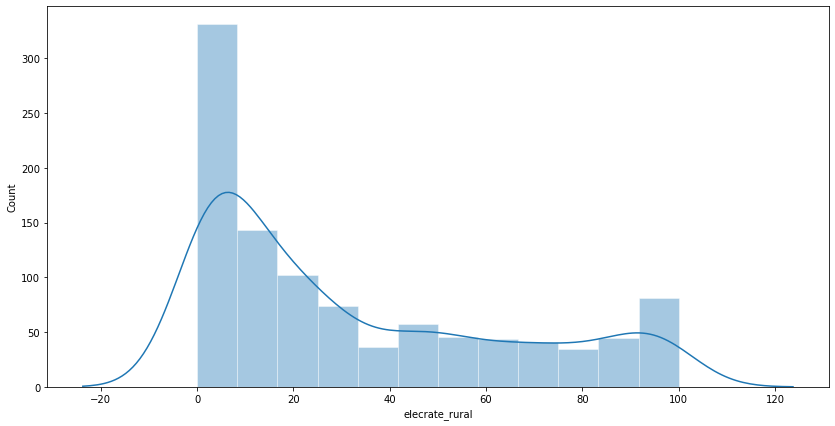

In [17]:
# Distribution of rural electrical rate after handling missing data
fig, ax = plt.subplots(figsize=(14,7))
sns.histplot(df['elecrate_rural'], kde=True, kde_kws=dict(cut=3),
             alpha=.4, edgecolor=(1, 1, 1, .4), ax=ax)
#distribution is skewed

In [18]:
df

,countryname,countrycode,year,elecrate_total,elecrate_urban,elecrate_rural
0,Albania,ALB,1970,100.0,70.550997,32.528779
1,Algeria,DZA,1966,33.7,74.000000,11.800000
2,Algeria,DZA,1969,40.0,76.318182,19.627273
3,Algeria,DZA,1977,45.8,78.636364,27.454545
4,Algeria,DZA,1981,59.0,80.954545,35.281818
...,...,...,...,...,...,...
1030,Zimbabwe,ZWE,2001,37.0,82.000000,20.000000
1031,Zimbabwe,ZWE,2002,39.0,84.000000,22.000000
1032,Zimbabwe,ZWE,2003,41.0,84.000000,23.000000
1033,Zimbabwe,ZWE,2004,41.0,85.000000,25.000000


In [19]:
df.describe()
#there are 1035 enteries in our dataset
#the mean total electricity  consumption is 52%
#the dataset spans from 1949 to 2015

,year,elecrate_total,elecrate_urban,elecrate_rural
count,1035.000000,1035.000000,1035.000000,1035.000000
mean,1997.500483,52.004968,70.550997,32.528779
std,13.396814,33.972724,24.991341,31.703640
min,1949.000000,0.200000,0.500000,0.000000
25%,1992.000000,19.000000,51.350000,5.200000
50%,2001.000000,48.110000,76.166667,20.000000
75%,2008.000000,87.400000,92.522727,54.842071
max,2015.000000,100.000000,100.000000,100.000000


In [20]:
df.isnull().any()

countryname       False
countrycode       False
year              False
elecrate_total    False
elecrate_urban    False
elecrate_rural    False
dtype: bool

<AxesSubplot:xlabel='elecrate_total'>

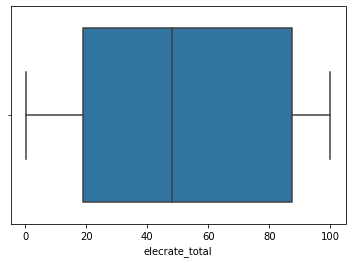

In [21]:
# boxplot of the target variable to check for outliers. there are no visible outliers
sns.boxplot(x = df['elecrate_total'])

In [22]:
# Identify the outliers in the target variable
Q1 = df['elecrate_total'].quantile(0.25)
Q3 = df['elecrate_total'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['elecrate_total'] < (Q1 - 1.5 * IQR)) | (df['elecrate_total'] > (Q3 + 1.5 * IQR))]
outliers
#interquartile range confirms that there are no outliers in the target variable

,countryname,countrycode,year,elecrate_total,elecrate_urban,elecrate_rural


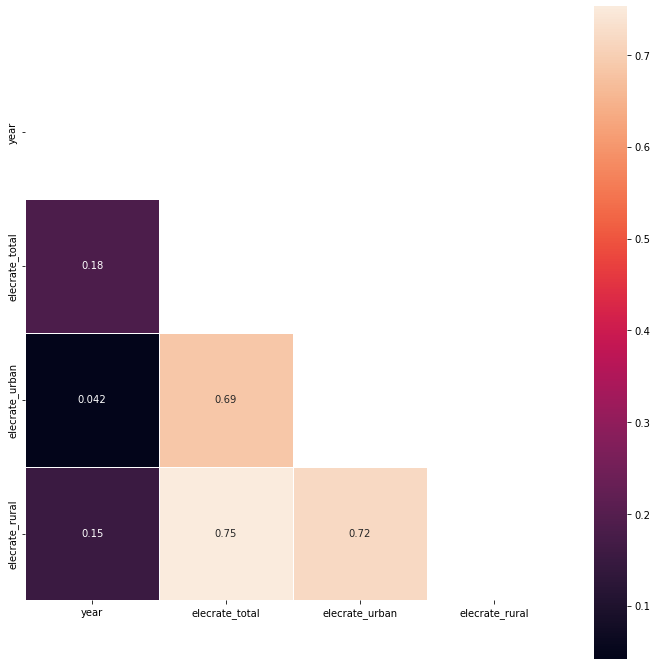

In [23]:
#using a heatmap to show correlation
fig, ax = plt.subplots(figsize=(12,12))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), linewidths=0.5, mask=mask, square=True, ax=ax, annot=True);
#very low correlation between 'year' and the target variable so it will be droopped when fitting the model
# high correlation between urban electricity rate, rural electricity rate and the target variable, total electricity rate
#also, high correlation between urban and rural electricity rate so to avoid multicolinearity(treshold=0.7), we drop
#the urban electricity rate variable as it has lower correlation than rural electricity rate with the target variable

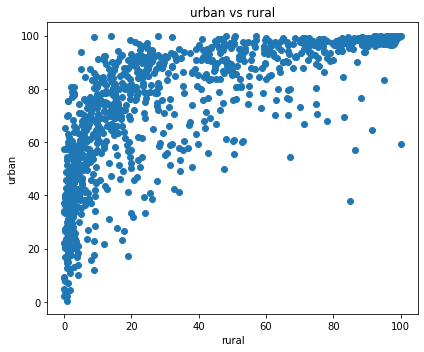

In [24]:
#scatter plots of urban vs rural
fig, ax= plt.subplots(figsize=(6, 5))
ax.scatter(df['elecrate_rural'], df['elecrate_urban'])
ax.set_title(f'urban vs rural')
ax.set_xlabel('rural')
ax.set_ylabel('urban')
fig.tight_layout();
#a strong positive correlation with a a few outliers as mahjority of data points will form clusters 
#around a straight line through them

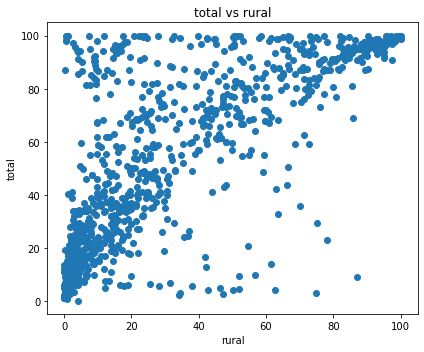

In [25]:
#scatter plots of total vs rural
fig, ax= plt.subplots(figsize=(6, 5))
ax.scatter(df['elecrate_rural'], df['elecrate_total'])
ax.set_title(f'total vs rural')
ax.set_xlabel('rural')
ax.set_ylabel('total')
fig.tight_layout();
#strong positivelinear relationship between both variables as they will form clusters around a straight line through them
#there are few outliers

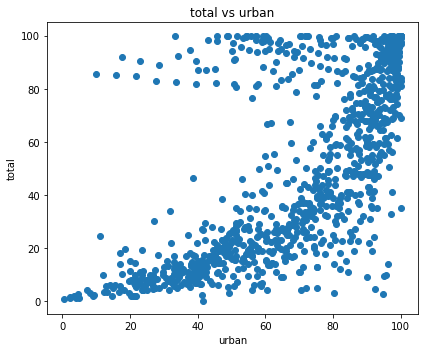

In [26]:
#scatter plots of total vs urban
fig, ax= plt.subplots(figsize=(6, 5))
ax.scatter(df['elecrate_urban'], df['elecrate_total'])
ax.set_title(f'total vs urban')
ax.set_xlabel('urban')
ax.set_ylabel('total')
fig.tight_layout();
#a less strong positive correlation with more outliers

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'elecrate_total'}>],
       [<AxesSubplot:title={'center':'elecrate_urban'}>,
        <AxesSubplot:title={'center':'elecrate_rural'}>]], dtype=object)

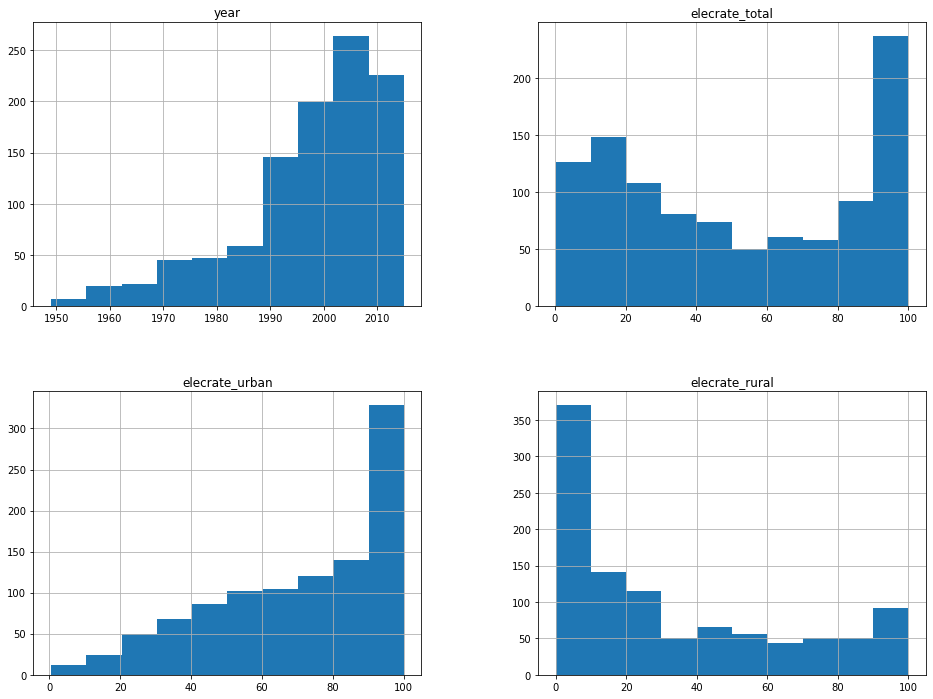

In [27]:
# distribution of features
df.hist(figsize=(16,12))
#highest total and urban electricity rate recorded is 100% and 0% in rural communities
#most of the data entry was done between year 2000 and 2010

In [28]:
df['year'].unique()

array([1970, 1966, 1969, 1977, 1981, 1985, 1987, 1989, 1993, 1996, 2005,
       2008, 2010, 2013, 2001, 2004, 2009, 1960, 1991, 2003, 1963, 1990,
       2000, 2015, 1965, 1971, 2012, 1976, 1982, 1995, 1997, 1998, 1999,
       2002, 2011, 2006, 1992, 1994, 2014, 2007, 1988, 1972, 1973, 1980,
       1956, 1975, 1986, 1978, 1951, 1964, 1974, 1984, 1959, 1955, 1961,
       1983, 1949, 1979, 1952, 1962, 1967, 1968, 1953, 1957, 1950],
      dtype=int16)

In [29]:
df1 = df.copy()

In [30]:
df1

,countryname,countrycode,year,elecrate_total,elecrate_urban,elecrate_rural
0,Albania,ALB,1970,100.0,70.550997,32.528779
1,Algeria,DZA,1966,33.7,74.000000,11.800000
2,Algeria,DZA,1969,40.0,76.318182,19.627273
3,Algeria,DZA,1977,45.8,78.636364,27.454545
4,Algeria,DZA,1981,59.0,80.954545,35.281818
...,...,...,...,...,...,...
1030,Zimbabwe,ZWE,2001,37.0,82.000000,20.000000
1031,Zimbabwe,ZWE,2002,39.0,84.000000,22.000000
1032,Zimbabwe,ZWE,2003,41.0,84.000000,23.000000
1033,Zimbabwe,ZWE,2004,41.0,85.000000,25.000000


In [31]:
# Identify categorical columns
df1.select_dtypes(include=['category', 'object']).columns

Index(['countryname', 'countrycode'], dtype='object')

In [32]:
df1['countryname'].nunique()

124

In [33]:
# Create dictionary to map categories to integer values
country_dict = {country: i for i, country in enumerate(df1['countryname'].unique())}


In [34]:
# Replace categories with integer values
df1['countryname'] = df1['countryname'].replace(country_dict)

In [35]:
#encoding target variable, total electricity consumption rate as low or high

# Define a threshold value to distinguish between low and high values
threshold = 50.0

# Create a new column to encode the low/high values

df1['elecrate_total'] = pd.cut(df['elecrate_total'], 
                                                    bins=[-float('inf'), threshold, float('inf')], 
                                                    labels=['low', 'high'])

df1


,countryname,countrycode,year,elecrate_total,elecrate_urban,elecrate_rural
0,0,ALB,1970,high,70.550997,32.528779
1,1,DZA,1966,low,74.000000,11.800000
2,1,DZA,1969,low,76.318182,19.627273
3,1,DZA,1977,low,78.636364,27.454545
4,1,DZA,1981,high,80.954545,35.281818
...,...,...,...,...,...,...
1030,123,ZWE,2001,low,82.000000,20.000000
1031,123,ZWE,2002,low,84.000000,22.000000
1032,123,ZWE,2003,low,84.000000,23.000000
1033,123,ZWE,2004,low,85.000000,25.000000


In [36]:
#check to see if target variable is imbalanced
class_counts = df1['elecrate_total'].value_counts()
total_samples = class_counts.sum()
class_distribution = class_counts / total_samples

# Print the class distribution
print(class_distribution)
#There is no imbalance as the ratio is 51:48

low     0.518841
high    0.481159
Name: elecrate_total, dtype: float64


In [37]:
from sklearn.preprocessing import StandardScaler

# Apply standard scaling to the column
scaler = StandardScaler()
df1['scaled_elecrate_rural'] = scaler.fit_transform(df1[['elecrate_rural']])

df1['scaled_elecrate_rural']

0       4.484572e-16
1      -6.541457e-01
2      -4.071376e-01
3      -1.601295e-01
4       8.687866e-02
            ...     
1030   -3.953753e-01
1031   -3.322606e-01
1032   -3.007032e-01
1033   -2.375885e-01
1034   -2.375885e-01
Name: scaled_elecrate_rural, Length: 1035, dtype: float64

In [38]:
df1

,countryname,countrycode,year,elecrate_total,elecrate_urban,elecrate_rural,scaled_elecrate_rural
0,0,ALB,1970,high,70.550997,32.528779,4.484572e-16
1,1,DZA,1966,low,74.000000,11.800000,-6.541457e-01
2,1,DZA,1969,low,76.318182,19.627273,-4.071376e-01
3,1,DZA,1977,low,78.636364,27.454545,-1.601295e-01
4,1,DZA,1981,high,80.954545,35.281818,8.687866e-02
...,...,...,...,...,...,...,...
1030,123,ZWE,2001,low,82.000000,20.000000,-3.953753e-01
1031,123,ZWE,2002,low,84.000000,22.000000,-3.322606e-01
1032,123,ZWE,2003,low,84.000000,23.000000,-3.007032e-01
1033,123,ZWE,2004,low,85.000000,25.000000,-2.375885e-01


In [39]:
#Splitting the data
#Feture selection: dropping the year column due to low correlation with other variables and target variable
# dropping 'elecrate_ urban variable to avoid multicolinearity'
# dropping 'countrycode' because it is the same as 'countryname' variable
X = df1.drop(['countrycode','year','elecrate_urban','elecrate_rural','elecrate_total'],axis= 1)
y= df1['elecrate_total']

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Define a dictionary of models to test
models = {'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

# fuction to Loop over the dictionary of models and evaluate performance using accuracy_score

def fit_and_score_model(models, X_train, y_train, X_test, y_test):
    model_score = {}
    for name,model in models.items():
        model.fit(X_train, y_train) #fit model to data
        model_score[name] = model.score(X_test, y_test) #model score
    return model_score


In [43]:
score = fit_and_score_model(models,X_train, y_train, X_test, y_test)
score 
#random forest classifier model performed best

{'Logistic Regression': 0.842443729903537,
 'Decision Tree': 0.842443729903537,
 'Random Forest': 0.8553054662379421,
 'Support Vector Machine': 0.5787781350482315}

In [44]:
best_model = RandomForestClassifier(n_estimators=100)

In [45]:
best_model.fit(X_train,y_train)

RandomForestClassifier()

In [46]:
y_pred = best_model.predict(X_test)

In [47]:
#evaluate model
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        high       0.87      0.85      0.86       163
         low       0.84      0.86      0.85       148

    accuracy                           0.85       311
   macro avg       0.85      0.85      0.85       311
weighted avg       0.85      0.85      0.85       311



In [48]:
print(confusion_matrix(y_test,y_pred))
#138 instances were correctly clasified as positive (high total electricity rate)
#21 instances were incorrectly classified as positive 
#25 instances were incorrectly classified as negative (low total electricity rate)
#127 instances were correctly classified as negative

[[138  25]
 [ 21 127]]


In [49]:
#Model Improvement
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_:.3f}')


Best parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best score: 0.889


In [50]:
#develop improved model
improved_rf = RandomForestClassifier(n_estimators=200,max_depth=20,min_samples_leaf=1,min_samples_split=5)
improved_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=200)

In [51]:
predictions = improved_rf.predict(X_test)

In [52]:
#evaluate improved model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

        high       0.88      0.87      0.87       163
         low       0.85      0.86      0.86       148

    accuracy                           0.86       311
   macro avg       0.86      0.86      0.86       311
weighted avg       0.87      0.86      0.86       311



In [53]:
print(confusion_matrix(y_test,predictions))
#141 instances were correctly clasified as positive (high total electricity rate)
#20 instances were incorrectly classified as positive 
#22 instances were incorrectly classified as negative (low total electricity rate)
#128 instances were correctly classified as negative

[[141  22]
 [ 20 128]]
